In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\UMAR DATA\\Data Sciences\\machine learning\\Projects\\kaggle dataset\\loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Data Understanding

In [3]:
df.shape

(4269, 13)

In [4]:
df=df.drop(['loan_id'],axis='columns')

In [5]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [8]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
df.describe(include='object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15556\1602829006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=' loan_status',palette='Set3')


Text(0.5, 1.0, 'Distribution of Loan Status')

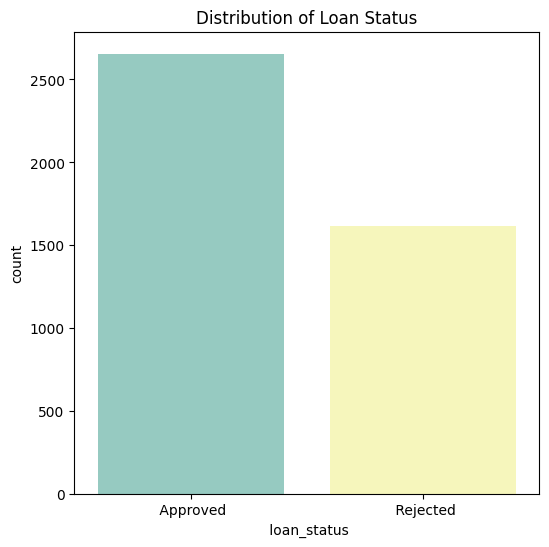

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x=' loan_status',palette='Set3')
plt.title("Distribution of Loan Status")

# Feature Engineering

In [11]:
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [12]:
df['income_per_month']=df['income_annum']/12
df['income_per_month(lac)']=df['income_per_month']/100000
df['loan_amount(lac)']=df['loan_amount']/100000
df['commercial_assets_value(lac)']=df['commercial_assets_value']/100000
df['luxury_assets_value']=df['luxury_assets_value']/100000
df['residential_assets_value(lac)']=df['residential_assets_value']/100000
df['bank_asset_value']=df['bank_asset_value']/100000

In [13]:
df=df.drop(['loan_amount','commercial_assets_value','luxury_assets_value','bank_asset_value','income_per_month','residential_assets_value'],axis='columns')
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_term,cibil_score,loan_status,income_per_month(lac),loan_amount(lac),commercial_assets_value(lac),residential_assets_value(lac)
0,2,Graduate,No,9600000,12,778,Approved,8.000000,299.0,176.0,24.0
1,0,Not Graduate,Yes,4100000,8,417,Rejected,3.416667,122.0,22.0,27.0
2,3,Graduate,No,9100000,20,506,Rejected,7.583333,297.0,45.0,71.0
3,3,Graduate,No,8200000,8,467,Rejected,6.833333,307.0,33.0,182.0
4,5,Not Graduate,Yes,9800000,20,382,Rejected,8.166667,242.0,82.0,124.0


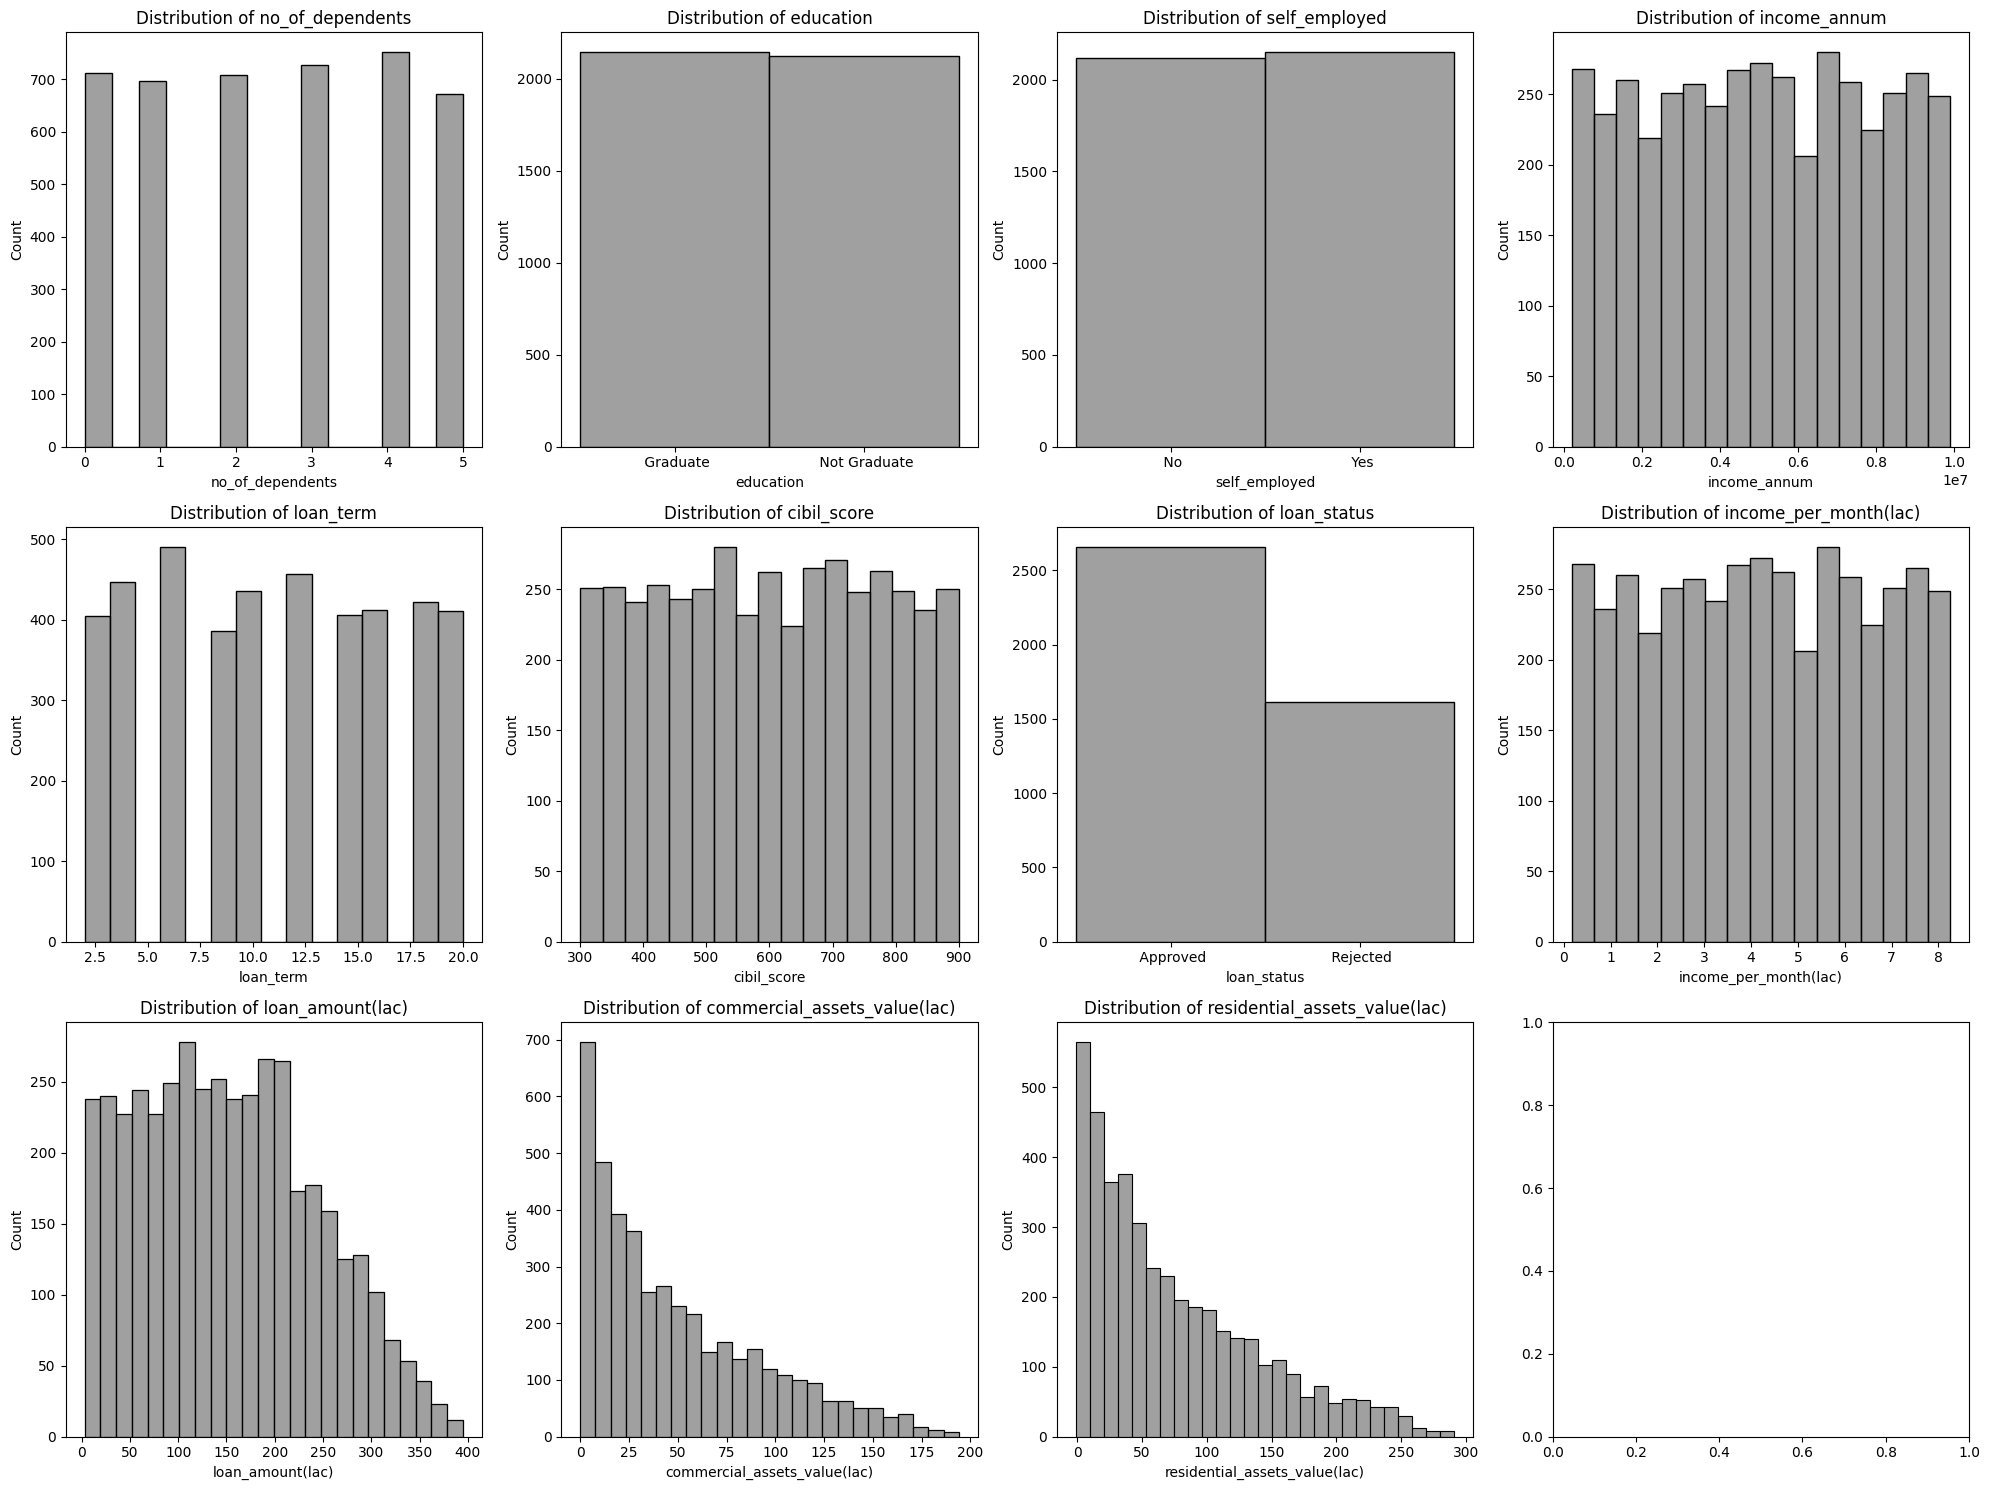

In [14]:
fig,axis=plt.subplots(3,4,figsize=(20,15))
axis=axis.flatten()
for i ,col in enumerate(df):
    ax=axis[i] 
    sns.histplot(data=df,x=col,color='grey',ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

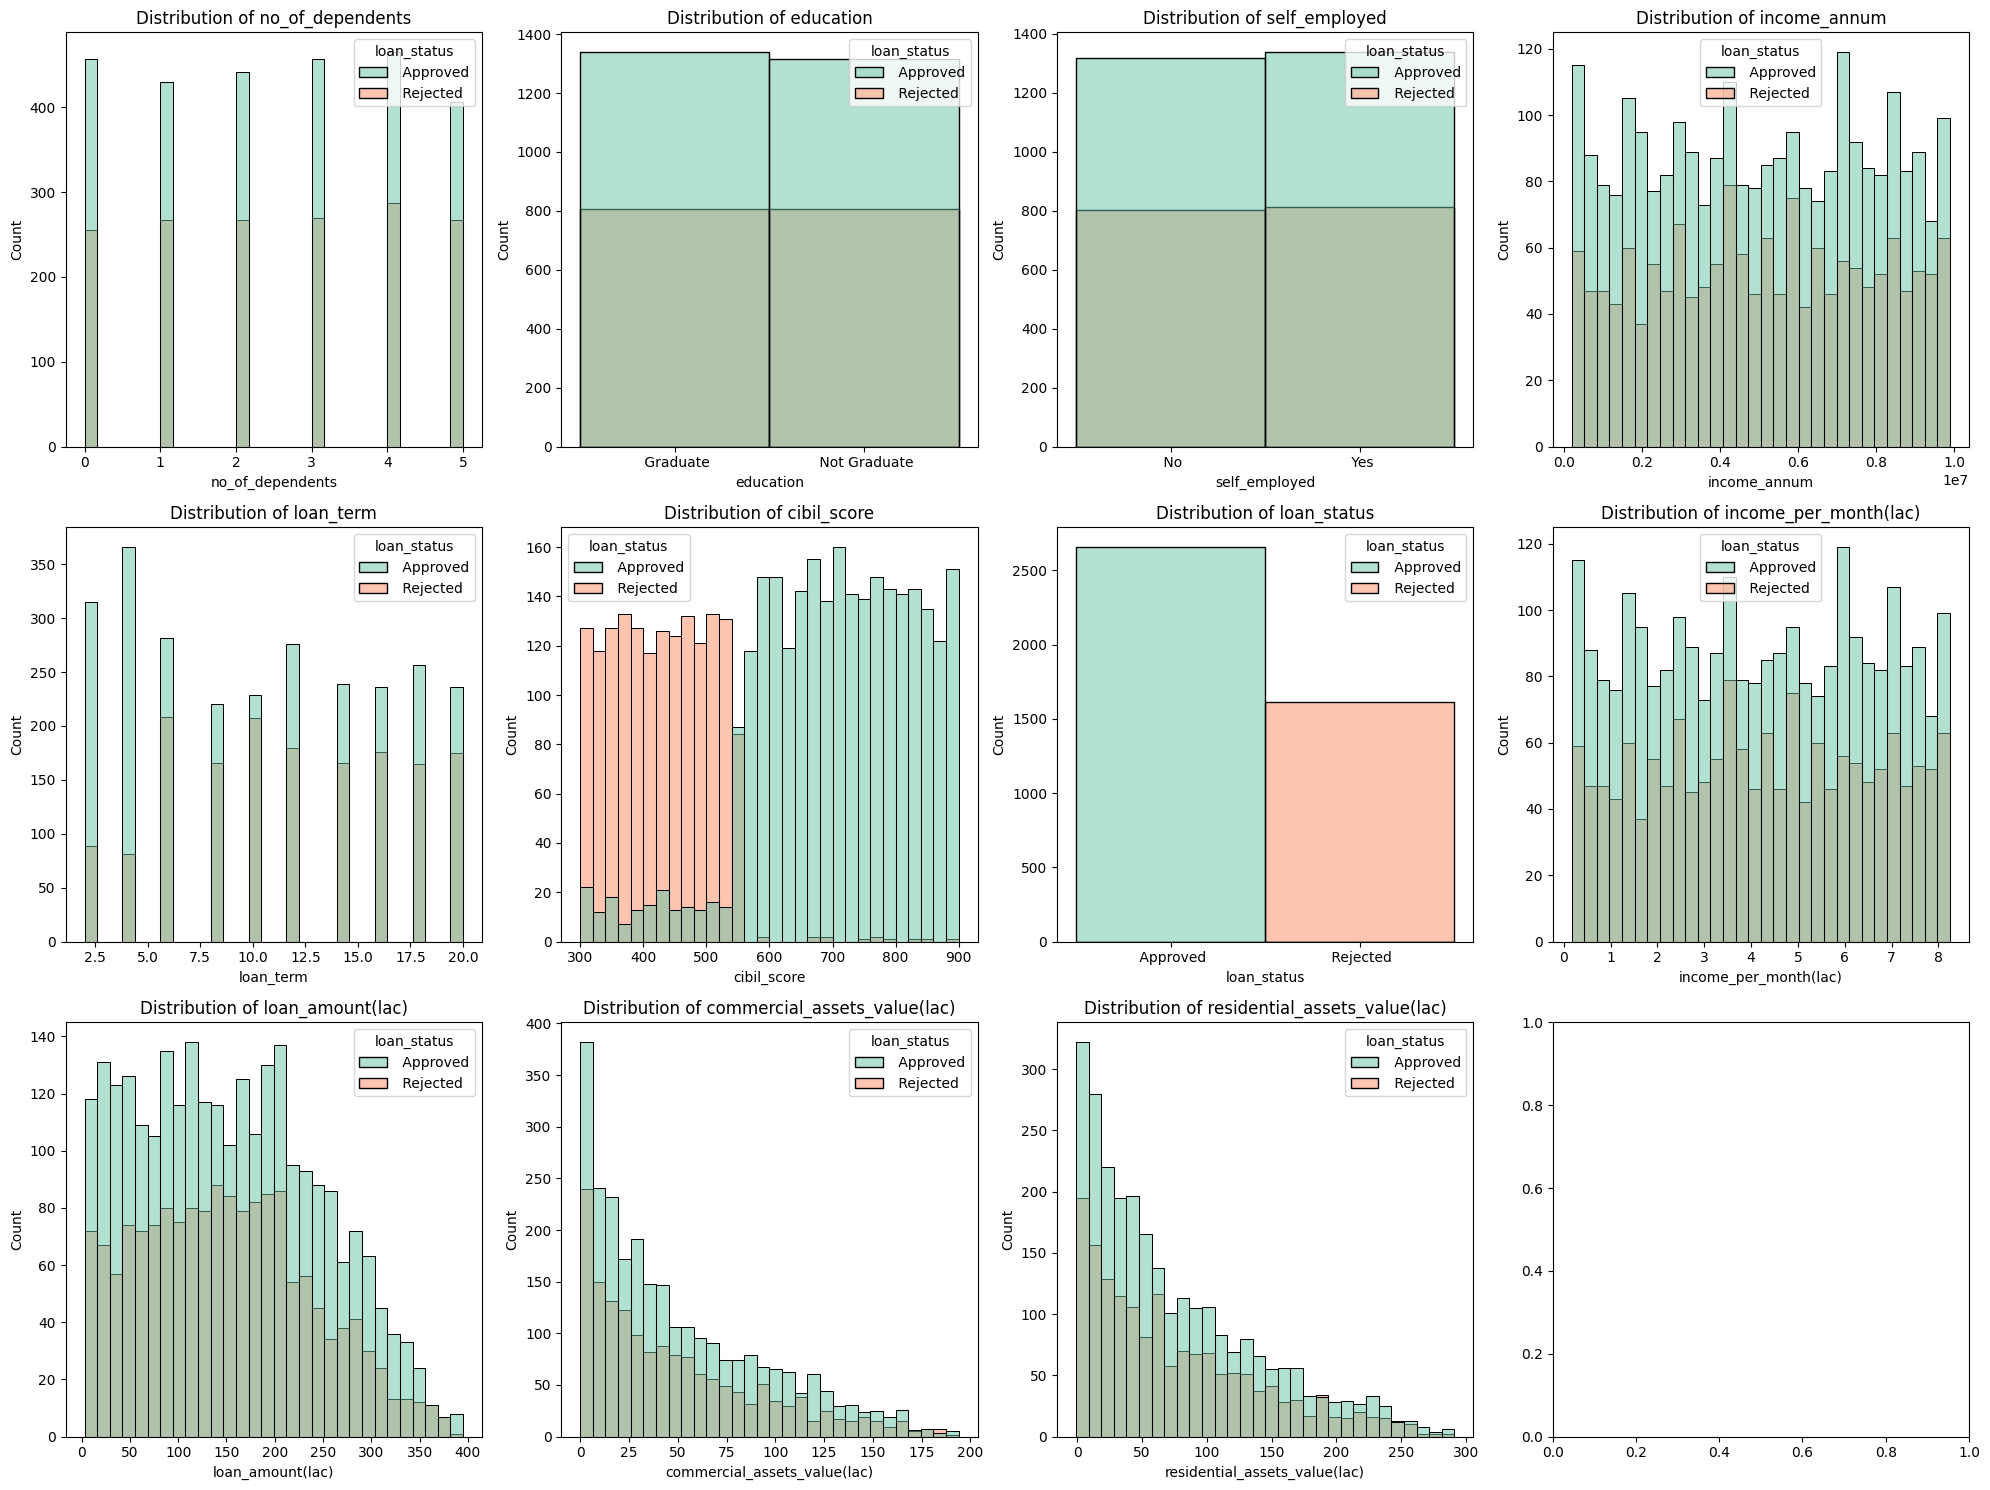

In [15]:
df1=df.drop(['loan_status'],axis='columns')
fig,axis=plt.subplots(3,4,figsize=(20,15))
axis=axis.flatten()
for i ,col in enumerate(df):
    ax=axis[i] 
    sns.histplot(data=df,x=col,hue='loan_status',palette='Set2',ax=ax,bins=30)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

In [16]:
df2=df.drop(['education','loan_status','self_employed'],axis='columns')
for i,col in enumerate(df2):
    u=df.groupby('loan_status')[col].mean()
    print(f'Average value of loan status in feature {col} is :\n{u}')

Average value of loan status in feature no_of_dependents is :
loan_status
Approved    2.474774
Rejected    2.538128
Name: no_of_dependents, dtype: float64
Average value of loan status in feature income_annum is :
loan_status
Approved    5.025904e+06
Rejected    5.113825e+06
Name: income_annum, dtype: float64
Average value of loan status in feature loan_term is :
loan_status
Approved    10.397590
Rejected    11.728456
Name: loan_term, dtype: float64
Average value of loan status in feature cibil_score is :
loan_status
Approved    703.461973
Rejected    429.468072
Name: cibil_score, dtype: float64
Average value of loan status in feature income_per_month(lac) is :
loan_status
Approved    4.188253
Rejected    4.261521
Name: income_per_month(lac), dtype: float64
Average value of loan status in feature loan_amount(lac) is :
loan_status
Approved    152.472515
Rejected    149.460632
Name: loan_amount(lac), dtype: float64
Average value of loan status in feature commercial_assets_value(lac) is :


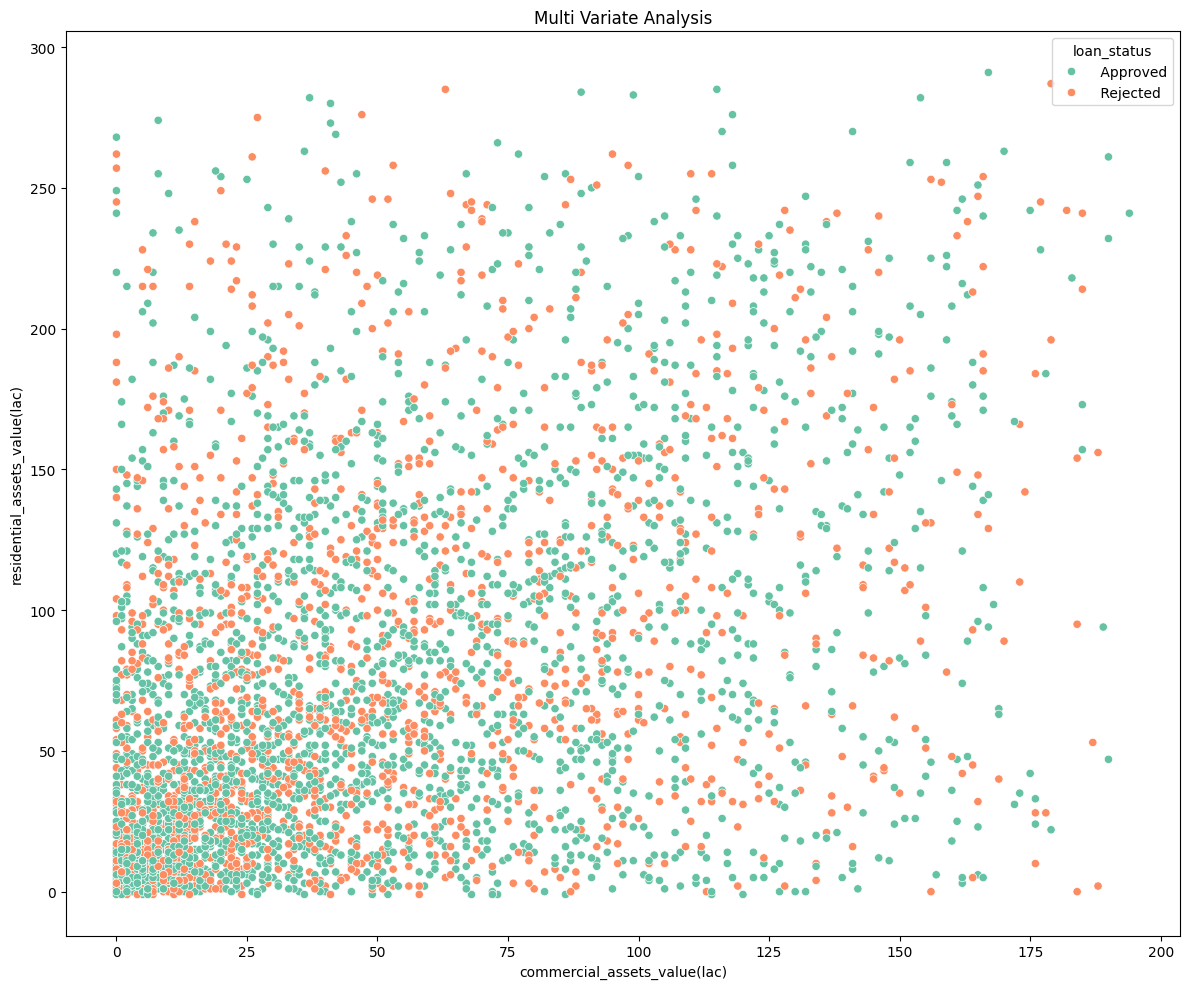

In [17]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df,x='commercial_assets_value(lac)',y='residential_assets_value(lac)',hue='loan_status',palette='Set2')
plt.title('Multi Variate Analysis')
plt.tight_layout()

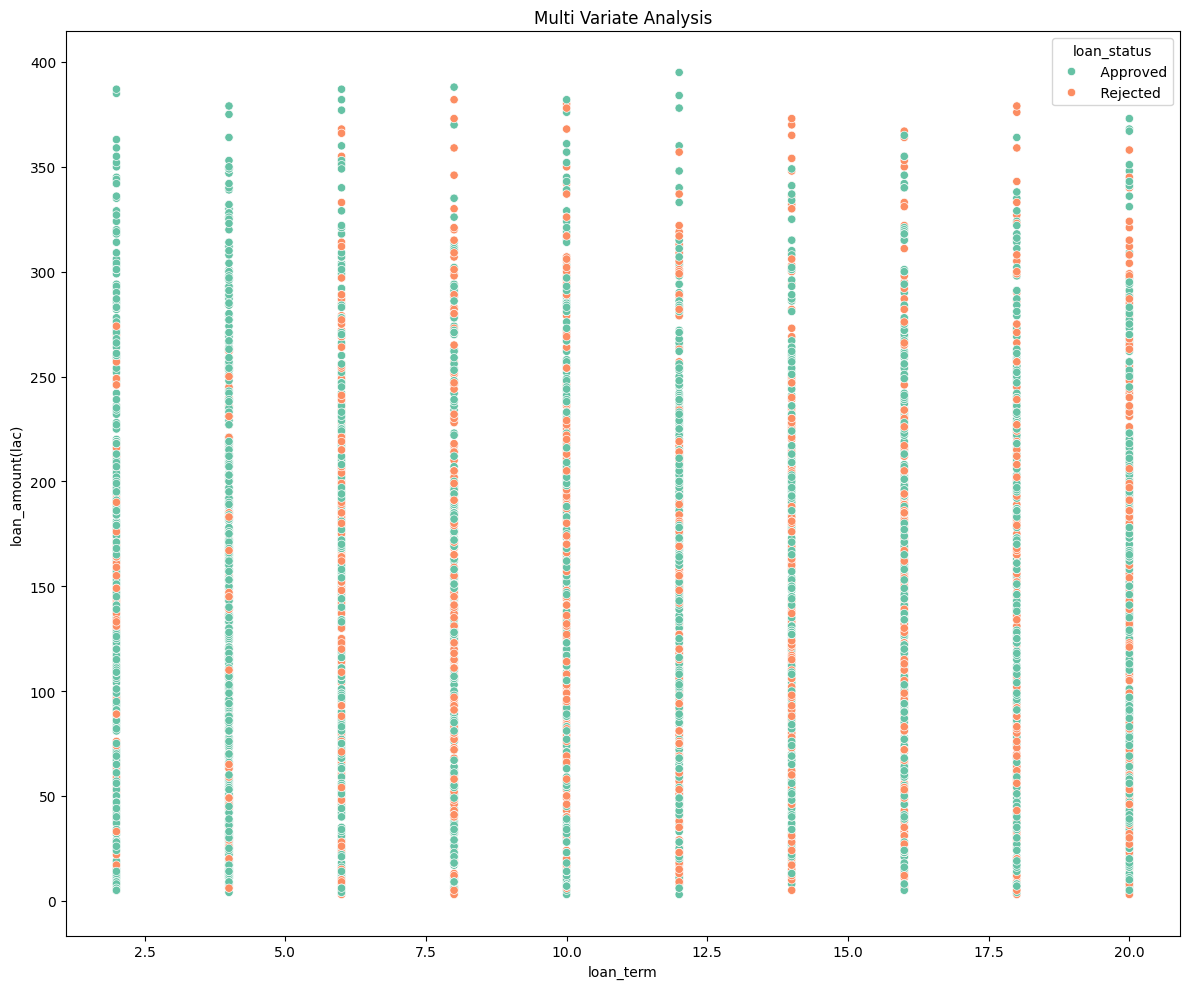

In [18]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df,x='loan_term',y='loan_amount(lac)',hue='loan_status',palette='Set2')
plt.title('Multi Variate Analysis')
plt.tight_layout()

# Data Preprocess for Training

In [19]:
from sklearn.preprocessing import LabelEncoder
le_edu=LabelEncoder()
le_emp=LabelEncoder()
le_st=LabelEncoder()
df['education']=le_edu.fit_transform(df['education'])
df['self_employed']=le_emp.fit_transform(df['self_employed'])
df['loan_status']=le_st.fit_transform(df['loan_status'])

In [20]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_term,cibil_score,loan_status,income_per_month(lac),loan_amount(lac),commercial_assets_value(lac),residential_assets_value(lac)
0,2,0,0,9600000,12,778,0,8.000000,299.0,176.0,24.0
1,0,1,1,4100000,8,417,1,3.416667,122.0,22.0,27.0
2,3,0,0,9100000,20,506,1,7.583333,297.0,45.0,71.0
3,3,0,0,8200000,8,467,1,6.833333,307.0,33.0,182.0
4,5,1,1,9800000,20,382,1,8.166667,242.0,82.0,124.0


Text(0.5, 1.0, 'Correlation Matrix')

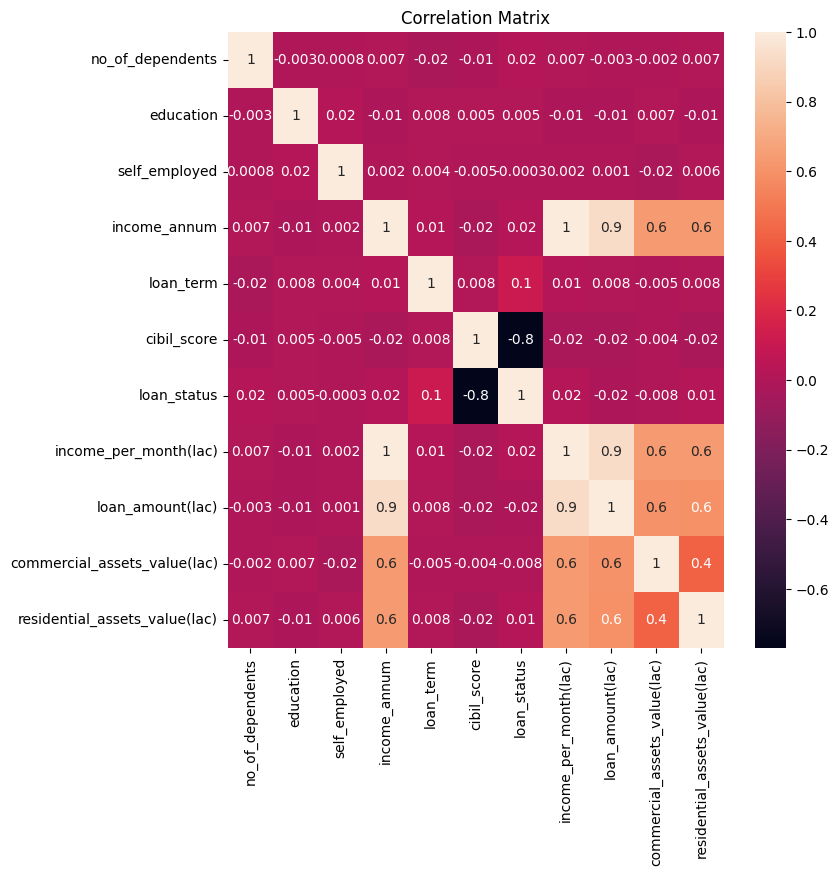

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.1g')
plt.title('Correlation Matrix')

In [22]:
x=df.drop(['loan_status','income_annum','no_of_dependents','education','self_employed','commercial_assets_value(lac)'],axis=True)
y=df.loan_status

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=0,test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()
Rf.fit(x_train,y_train)
Rf.score(x_test,y_test)

0.9812646370023419

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,confusion_matrix
y_pred=Rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.97      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



Text(0.5, 1.0, 'Confusion matrix')

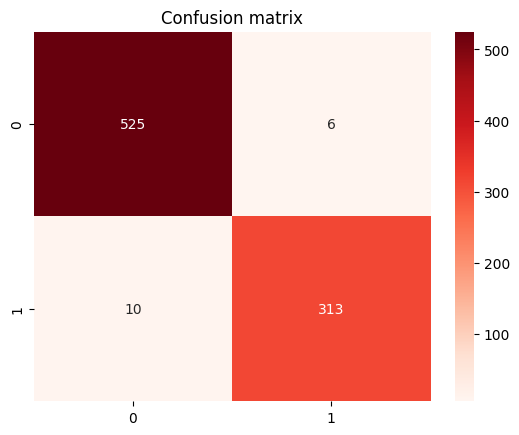

In [26]:
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,annot=True,cmap='Reds',fmt='d')
plt.title('Confusion matrix')

In [27]:
feature=Rf.feature_names_in_
important=Rf.feature_importances_
feature_importance=pd.DataFrame({
    'Feature_name':feature,
    'importance score':important
})
feature_importance=feature_importance.sort_values(by='importance score',ascending=False)
feature_importance

,Feature_name,importance score
1,cibil_score,0.848700
0,loan_term,0.065338
3,loan_amount(lac),0.036315
2,income_per_month(lac),0.028080
4,residential_assets_value(lac),0.021567
